<a href="https://colab.research.google.com/github/Anusha-T8/ProgrammingAssignment2/blob/master/movieopeningsanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing required libraries.

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

In [ ]:
path="/content/AUDIENCE_READINESS_TO_CINEMAS_DATA_COLLECTION.csv"

In [ ]:
df=pd.read_csv(path, na_values=' ')

In [ ]:
df.head()

,Timestamp,Email Address,Name,Age,Sex,Occupation,Eager to rush to cinemas for entertainment?,Location,According to you should safety and hygienic protocols be implemented throughout the cinemas at all times?,Do you prefer social distancing/alternate seating in the movies even with your friends and families?,Will you accept price hike in movie tickets?,Movie visiting time,Option to carry own food,What would you prefer for new movies release considering all current scenarios?,"According to you, risk range of going to cinemas",Factors Impacting Decision to Visit,Which is your most trusted Cinemas?
0,10/20/2020 10:23:31,karthikrgowda33@gmail.com,Karthik R,18-28,Male,Student,No,Urban,Strongly agree,Agree,No,Night time (the last two shows when there is l...,Highly prefer carrying own food,Cinemas,4,To hang out with friends/families,Theatre
1,10/20/2020 10:25:29,aishwaryadsouza25@gmail.com,Aishwarya E D'Souza,18-28,Female,Student,No,Urban,Disagree,Disagree,No,Not visiting cinemas,Not visiting Cinemas,OTT entertainment,4,"Precautions taken by cinemas, Cinemas in conta...",PVR
2,10/20/2020 10:33:00,chandanrajanna@gmail.com,Chandan,18-28,Male,Student,No,Urban,"Neutral, depends on the number of people visit...",Disagree,No,Night time (the last two shows when there is l...,Not visiting Cinemas,OTT entertainment,4,Not interested in visiting cinemas,None
3,10/20/2020 10:35:24,sunainaravikumar123@gmail.com,Sunaina,18-28,Female,Professionals/Government/Private employees,No,Urban,Strongly agree,Agree,No,Not visiting cinemas,Not visiting Cinemas,OTT entertainment,4,Not interested in visiting cinemas,PVR
4,10/20/2020 10:35:28,sunainaravikumar123@gmail.com,Sunaina,18-28,Female,Professionals/Government/Private employees,No,Urban,Strongly agree,Agree,No,Not visiting cinemas,Not visiting Cinemas,OTT entertainment,4,Not interested in visiting cinemas,PVR


Editing header row

In [ ]:
df.columns

Index(['Timestamp', 'Email Address', 'Name', 'Age', 'Sex', 'Occupation',
       'Eager to rush to cinemas for entertainment?', 'Location',
       'According to you should safety and hygienic protocols be implemented throughout the cinemas at all times?',
       'Do you prefer social distancing/alternate seating in the movies even with your friends and families?',
       'Will you accept price hike in movie tickets?', 'Movie visiting time',
       'Option to carry own food',
       'What would you prefer for new movies release considering all current scenarios?',
       'According to you, risk range of going to cinemas',
       'Factors Impacting Decision to Visit',
       'Which is your most trusted Cinemas?'],
      dtype='object')

In [ ]:
df.drop(['Timestamp','Email Address'], axis=1,inplace=True)

In [ ]:
df.rename(columns={"Eager to rush to cinemas for entertainment?":'Eager','According to you should safety and hygienic protocols be implemented throughout the cinemas at all times?':'Implement_safety','Do you prefer social distancing/alternate seating in the movies even with your friends and families?':'alternate_seating','Will you accept price hike in movie tickets?':'Price_hike','Movie visiting time':'Visit_time','Option to carry own food':'Food_option','What would you prefer for new movies release considering all current scenarios?':'OTT/Cinema','According to you, risk range of going to cinemas':'Risk_factor','Factors Impacting Decision to Visit':'Factors_impacting','Which is your most trusted Cinemas?':'Trustworthy'},inplace=True)

In [ ]:
df.columns

Index(['Name', 'Age', 'Sex', 'Occupation', 'Eager', 'Location',
       'Implement_safety', 'alternate_seating', 'Price_hike', 'Visit_time',
       'Food_option', 'OTT/Cinema', 'Risk_factor', 'Factors_impacting',
       'Trustworthy'],
      dtype='object')

Checking attributes of the dataset

In [ ]:
df.head()

,Name,Age,Sex,Occupation,Eager,Location,Implement_safety,alternate_seating,Price_hike,Visit_time,Food_option,OTT/Cinema,Risk_factor,Factors_impacting,Trustworthy
0,Karthik R,18-28,Male,Student,No,Urban,Strongly agree,Agree,No,Night time (the last two shows when there is l...,Highly prefer carrying own food,Cinemas,4,To hang out with friends/families,Theatre
1,Aishwarya E D'Souza,18-28,Female,Student,No,Urban,Disagree,Disagree,No,Not visiting cinemas,Not visiting Cinemas,OTT entertainment,4,"Precautions taken by cinemas, Cinemas in conta...",PVR
2,Chandan,18-28,Male,Student,No,Urban,"Neutral, depends on the number of people visit...",Disagree,No,Night time (the last two shows when there is l...,Not visiting Cinemas,OTT entertainment,4,Not interested in visiting cinemas,None
3,Sunaina,18-28,Female,Professionals/Government/Private employees,No,Urban,Strongly agree,Agree,No,Not visiting cinemas,Not visiting Cinemas,OTT entertainment,4,Not interested in visiting cinemas,PVR
4,Sunaina,18-28,Female,Professionals/Government/Private employees,No,Urban,Strongly agree,Agree,No,Not visiting cinemas,Not visiting Cinemas,OTT entertainment,4,Not interested in visiting cinemas,PVR


In [ ]:
df.tail()

,Name,Age,Sex,Occupation,Eager,Location,Implement_safety,alternate_seating,Price_hike,Visit_time,Food_option,OTT/Cinema,Risk_factor,Factors_impacting,Trustworthy
135,Sagar,38-48,Male,Professionals/Government/Private employees,No,Urban,Strongly agree,Agree,Yes,Anytime as per your conveience,Highly prefer carrying own food,Cinemas,5,"Precautions taken by cinemas, Not interested i...",None
136,Aishwarya,28-38,Female,Professionals/Government/Private employees,No,Urban,Strongly agree,Agree,No,Anytime as per your conveience,Highly prefer carrying own food,Cinemas,5,"Precautions taken by cinemas, Coronavirus case...",None
137,Shashi,38-48,Male,Professionals/Government/Private employees,No,Urban,Strongly agree,Agree,No,Anytime as per your conveience,No food should be entertained at cinemas,Cinemas,5,Coronavirus cases in the city,None
138,Kishan,28-38,Male,Business,No,Urban,"Neutral, depends on the number of people visit...",Disagree,No,Anytime as per your conveience,Highly prefer carrying own food,Cinemas,4,Precautions taken by cinemas,PVR
139,Lakshmi,28-38,Female,Home maker,No,Urban,Strongly agree,Agree,No,Anytime as per your conveience,Highly prefer carrying own food,Cinemas,5,Coronavirus cases in the city,PVR


In [ ]:
df.index

RangeIndex(start=0, stop=140, step=1)

In [ ]:
df.shape

(140, 15)

In [ ]:
df.size

2100

In [ ]:
df.memory_usage()

Index                 128
Name                 1120
Age                  1120
Sex                  1120
Occupation           1120
Eager                1120
Location             1120
Implement_safety     1120
alternate_seating    1120
Price_hike           1120
Visit_time           1120
Food_option          1120
OTT/Cinema           1120
Risk_factor          1120
Factors_impacting    1120
Trustworthy          1120
dtype: int64

Data types of variables

In [ ]:
df.dtypes

Name                 object
Age                  object
Sex                  object
Occupation           object
Eager                object
Location             object
Implement_safety     object
alternate_seating    object
Price_hike           object
Visit_time           object
Food_option          object
OTT/Cinema           object
Risk_factor           int64
Factors_impacting    object
Trustworthy          object
dtype: object

In [ ]:
df.dtypes.value_counts()

object    14
int64      1
dtype: int64

In [ ]:
df[['Age']]=df[['Age']].astype('category')
df[['Sex']]=df[['Sex']].astype('category')
df[['Occupation']]=df[['Occupation']].astype('category')
df[['Eager']]=df[['Eager']].astype('category')
df[['Implement_safety']]=df[['Implement_safety']].astype('category')
##df[['alternate_seating']]=df[['aletrnate_seating']].astype('category')
df[['Price_hike']]=df[['Price_hike']].astype('category')
df[['Visit_time']]=df[['Visit_time']].astype('category')
df[['Food_option']]=df[['Food_option']].astype('category')
df[['OTT/Cinema']]=df[['OTT/Cinema']].astype('category')
df[['Factors_impacting']]=df[['Factors_impacting']].astype('category')
df[['Trustworthy']]=df[['Trustworthy']].astype('category')
df.dtypes

Name                   object
Age                  category
Sex                  category
Occupation           category
Eager                category
Location               object
Implement_safety     category
alternate_seating      object
Price_hike           category
Visit_time           category
Food_option          category
OTT/Cinema           category
Risk_factor             int64
Factors_impacting    category
Trustworthy          category
dtype: object

In [ ]:
df.dtypes.value_counts()

object      3
category    2
category    1
category    1
category    1
category    1
category    1
int64       1
category    1
category    1
category    1
category    1
dtype: int64

In [ ]:
df.isnull().sum()

Name                 0
Age                  0
Sex                  0
Occupation           0
Eager                0
Location             2
Implement_safety     0
alternate_seating    0
Price_hike           0
Visit_time           0
Food_option          0
OTT/Cinema           0
Risk_factor          0
Factors_impacting    0
Trustworthy          0
dtype: int64

In [ ]:
df['Location'].value_counts()

Urban    126
Rural     12
Name: Location, dtype: int64

In [ ]:
#df['Location'].replace(r'^\s*$ ', np.nan, regex=True)
df["Location"].replace(np.nan, "Urban", inplace=True)

In [ ]:
df.isnull().sum()

Name                 0
Age                  0
Sex                  0
Occupation           0
Eager                0
Location             0
Implement_safety     0
alternate_seating    0
Price_hike           0
Visit_time           0
Food_option          0
OTT/Cinema           0
Risk_factor          0
Factors_impacting    0
Trustworthy          0
dtype: int64

In [ ]:
df[['Location']]=df[['Location']].astype('category')


Text(0.5, 1.0, 'RISK FACTOR RANGE')

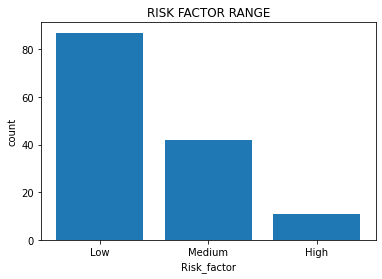

In [ ]:
df["Risk_factor"]=df["Risk_factor"].astype(int, copy=True)
bins = np.linspace(min(df["Risk_factor"]), max(df["Risk_factor"]), 4)
group_names = ['Low', 'Medium', 'High']
df['Risk_factor-binned'] = pd.cut(df['Risk_factor'], bins, labels=group_names, include_lowest=True )

##Bin Visualization using graph

pyplot.bar(group_names, df["Risk_factor-binned"].value_counts())
plt.pyplot.xlabel("Risk_factor")
plt.pyplot.ylabel("count")
plt.pyplot.title("RISK FACTOR RANGE")

In [ ]:
df['Risk_factor'].value_counts()

4    44
5    43
3    34
2     8
1     6
0     5
Name: Risk_factor, dtype: int64

In [ ]:
dummy_variable_1 = pd.get_dummies(df["OTT/Cinema"])
dummy_variable_1.rename(columns={'OTT entertainment':'OTT', 'Cinema':'Cinema'}, inplace=True)

##merging and dropping column fuel-type

df = pd.concat([df, dummy_variable_1], axis=1)
df.drop("OTT/Cinema", axis = 1, inplace=True)

df.head(15)

,Name,Age,Sex,Occupation,Eager,Location,Implement_safety,alternate_seating,Price_hike,Visit_time,Food_option,Risk_factor,Factors_impacting,Trustworthy,Risk_factor-binned,Cinemas,OTT
0,Karthik R,18-28,Male,Student,No,Urban,Strongly agree,Agree,No,Night time (the last two shows when there is l...,Highly prefer carrying own food,4,To hang out with friends/families,Theatre,High,1,0
1,Aishwarya E D'Souza,18-28,Female,Student,No,Urban,Disagree,Disagree,No,Not visiting cinemas,Not visiting Cinemas,4,"Precautions taken by cinemas, Cinemas in conta...",PVR,High,0,1
2,Chandan,18-28,Male,Student,No,Urban,"Neutral, depends on the number of people visit...",Disagree,No,Night time (the last two shows when there is l...,Not visiting Cinemas,4,Not interested in visiting cinemas,None,High,0,1
3,Sunaina,18-28,Female,Professionals/Government/Private employees,No,Urban,Strongly agree,Agree,No,Not visiting cinemas,Not visiting Cinemas,4,Not interested in visiting cinemas,PVR,High,0,1
4,Sunaina,18-28,Female,Professionals/Government/Private employees,No,Urban,Strongly agree,Agree,No,Not visiting cinemas,Not visiting Cinemas,4,Not interested in visiting cinemas,PVR,High,0,1
5,Shweta kulkarni,18-28,Female,Student,No,Urban,"Neutral, depends on the number of people visit...",Agree,Yes,Anytime as per your conveience,No food should be entertained at cinemas,3,"Precautions taken by cinemas, Coronavirus case...",PVR,Medium,1,0
6,Avinash B.U,18-28,Male,Student,Yes,Rural,Strongly agree,Agree,No,Anytime as per your conveience,Highly prefer carrying own food,5,"Precautions taken by cinemas, Coronavirus case...",PVR,High,1,0
7,Supriya k,18-28,Female,Student,Yes,Urban,Strongly agree,Agree,Yes,Anytime as per your conveience,No food should be entertained at cinemas,3,Coronavirus cases in the city,PVR,Medium,1,0
8,Kavya S,18-28,Female,Student,No,Urban,"Neutral, depends on the number of people visit...",Disagree,No,Not visiting cinemas,Not visiting Cinemas,5,Not interested in visiting cinemas,PVR,High,1,0
9,Srihari,18-28,Male,Professionals/Government/Private employees,No,Urban,Strongly agree,Agree,No,Anytime as per your conveience,Highly prefer carrying own food,3,"Precautions taken by cinemas, Cinemas in conta...",None,Medium,0,1


In [ ]:
df.tail()

,Name,Age,Sex,Occupation,Eager,Location,Implement_safety,alternate_seating,Price_hike,Visit_time,Food_option,Risk_factor,Factors_impacting,Trustworthy,Risk_factor-binned,Cinemas,OTT
135,Sagar,38-48,Male,Professionals/Government/Private employees,No,Urban,Strongly agree,Agree,Yes,Anytime as per your conveience,Highly prefer carrying own food,5,"Precautions taken by cinemas, Not interested i...",None,High,1,0
136,Aishwarya,28-38,Female,Professionals/Government/Private employees,No,Urban,Strongly agree,Agree,No,Anytime as per your conveience,Highly prefer carrying own food,5,"Precautions taken by cinemas, Coronavirus case...",None,High,1,0
137,Shashi,38-48,Male,Professionals/Government/Private employees,No,Urban,Strongly agree,Agree,No,Anytime as per your conveience,No food should be entertained at cinemas,5,Coronavirus cases in the city,None,High,1,0
138,Kishan,28-38,Male,Business,No,Urban,"Neutral, depends on the number of people visit...",Disagree,No,Anytime as per your conveience,Highly prefer carrying own food,4,Precautions taken by cinemas,PVR,High,1,0
139,Lakshmi,28-38,Female,Home maker,No,Urban,Strongly agree,Agree,No,Anytime as per your conveience,Highly prefer carrying own food,5,Coronavirus cases in the city,PVR,High,1,0


In [ ]:
df.size

2380

In [ ]:
df.shape

(140, 17)

In [ ]:
df.to_csv('audience_cinema_cleaned_dataset')